In [7]:
import pandas as pd

#create a dataframe for our AA
AA = pd.DataFrame(columns=['criteria','weight','ratingA','ratingB','scoreA','scoreB'])
print(AA)

Empty DataFrame
Columns: [criteria, weight, ratingA, ratingB, scoreA, scoreB]
Index: []


In [8]:
# first step: identify a set of criteria

AA['criteria'] = ['risk','ROI','feasibility','customer satisfaction','strategic alignment']
print(AA)

                criteria weight ratingA ratingB scoreA scoreB
0                   risk    NaN     NaN     NaN    NaN    NaN
1                    ROI    NaN     NaN     NaN    NaN    NaN
2            feasibility    NaN     NaN     NaN    NaN    NaN
3  customer satisfaction    NaN     NaN     NaN    NaN    NaN
4    strategic alignment    NaN     NaN     NaN    NaN    NaN


In [ ]:
# step 2: assign weights
# weights show relative importance of each criterion
# weights should add up to 1 or 100

AA['weight'] = [0.1, 0.15, 0.3, 0.15, 0.3]
print(AA)

                criteria  weight ratingA ratingB scoreA scoreB
0                   risk    0.10     NaN     NaN    NaN    NaN
1                    ROI    0.15     NaN     NaN    NaN    NaN
2            feasibility    0.30     NaN     NaN    NaN    NaN
3  customer satisfaction    0.15     NaN     NaN    NaN    NaN
4    strategic alignment    0.30     NaN     NaN    NaN    NaN


In [11]:
# step 3: rate each alternative across all criteria
# choose a scale: 1-3, 1-5, ...
# higher number: alternative is doing better regarding given criterion

print("Enter a score for each criteria\n")
print("Alternative A")

'''
for row in AA.index:
  print(AA['criteria'][row],":  ",end="")
  AA['ratingA'][row] = input()

print("\nAlternative B")

for row in AA.index:
  print(AA['criteria'][row],":  ",end="")
  AA['ratingB'][row] = input()
'''
AA['ratingA'] = [4,1,2,1,5]
AA['ratingB'] = [3,4,2,3,2]

Enter a score for each criteria

Alternative A


In [12]:
# step 4: calculate partial scores by ratings*weights
# using iterrows is an anti-pattern (not preferred)

for index, row in AA.iterrows():
  AA['scoreA'][index] = row['weight']*row['ratingA']
  AA['scoreB'][index] = row['weight']*row['ratingB']

print(AA)

                criteria weight  ratingA  ratingB scoreA scoreB
0                   risk    NaN        4        3    NaN    NaN
1                    ROI    NaN        1        4    NaN    NaN
2            feasibility    NaN        2        2    NaN    NaN
3  customer satisfaction    NaN        1        3    NaN    NaN
4    strategic alignment    NaN        5        2    NaN    NaN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
# step 5: add up partial scores to get a total score
# alternative with highest total score should be proposed

totalScoreA = 0
totalScoreB = 0

for index, row in AA.iterrows():
  totalScoreA += row['scoreA']
  totalScoreB += row['scoreB']

print('Total score for alternative A is {:.2f} and for alternative B is {:.2f}'.format(totalScoreA, totalScoreB))

Total score for alternative A is nan and for alternative B is nan


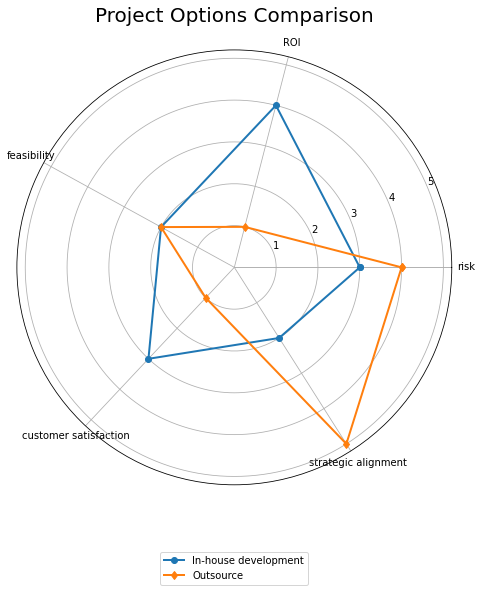

In [15]:
import numpy as np
import matplotlib.pyplot as plt

axisLocations = np.linspace(start=0, stop=2.1 * np.pi, num=len(AA['ratingA']), endpoint=False)
axisLocations = np.concatenate((axisLocations, [axisLocations[0]]))

ratingsA=AA['ratingA']
ratingsB=AA['ratingB']

ratingsBCircular = np.concatenate((ratingsA, [ratingsA[0]]))
ratingsACircular = np.concatenate((ratingsB, [ratingsB[0]]))

plt.figure(figsize = (8,8))
plt.subplot(polar=True)
plt.plot(axisLocations, ratingsACircular, 'o-', linewidth=2, label='In-house development')
plt.plot(axisLocations, ratingsBCircular, 'd-', linewidth=2, label='Outsource')

plt.title('Project Options Comparison', size=20)
lines, labels = plt.thetagrids(np.degrees(axisLocations), labels=AA['criteria'])
plt.legend(loc='lower center', borderaxespad=-10)
plt.show()